# 0 Library Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report, ConfusionMatrixDisplay, f1_score, roc_curve
from imblearn.under_sampling import ClusterCentroids
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import jax.numpy as jnp
from jax import random, jit, vmap, grad, device_put, value_and_grad
from jax.example_libraries import stax, optimizers
from jax.example_libraries.stax import Dense, Conv, Relu, MaxPool, Flatten, Softmax, sigmoid
from jax.nn import one_hot, log_sigmoid, relu
import itertools
from functools import partial
from tqdm import trange
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
from functools import partial
import xgboost as xgb
from tabulate import tabulate

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1 Data Overview

In [3]:
data = pd.read_csv('drive/MyDrive/ENM531/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [104]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
print('No Frauds:', data['Class'].value_counts()[0], 'data, which is', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds:   ', data['Class'].value_counts()[1], '   data, which is ', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds: 284315 data, which is 99.83 % of the dataset
Frauds:    492    data, which is  0.17 % of the dataset


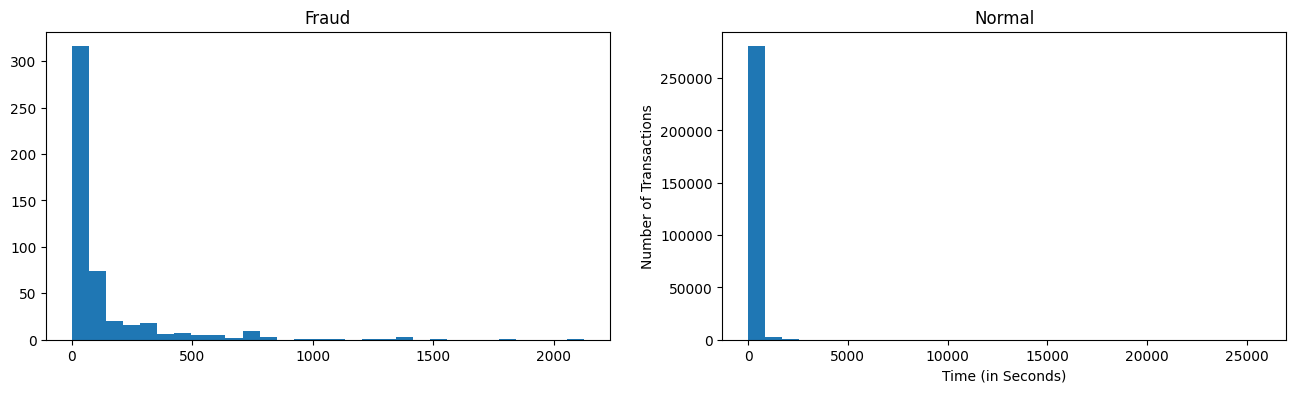

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(16,4))

bins = 30

ax1.hist(data.Amount[data.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data.Amount[data.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

<Figure size 640x480 with 0 Axes>

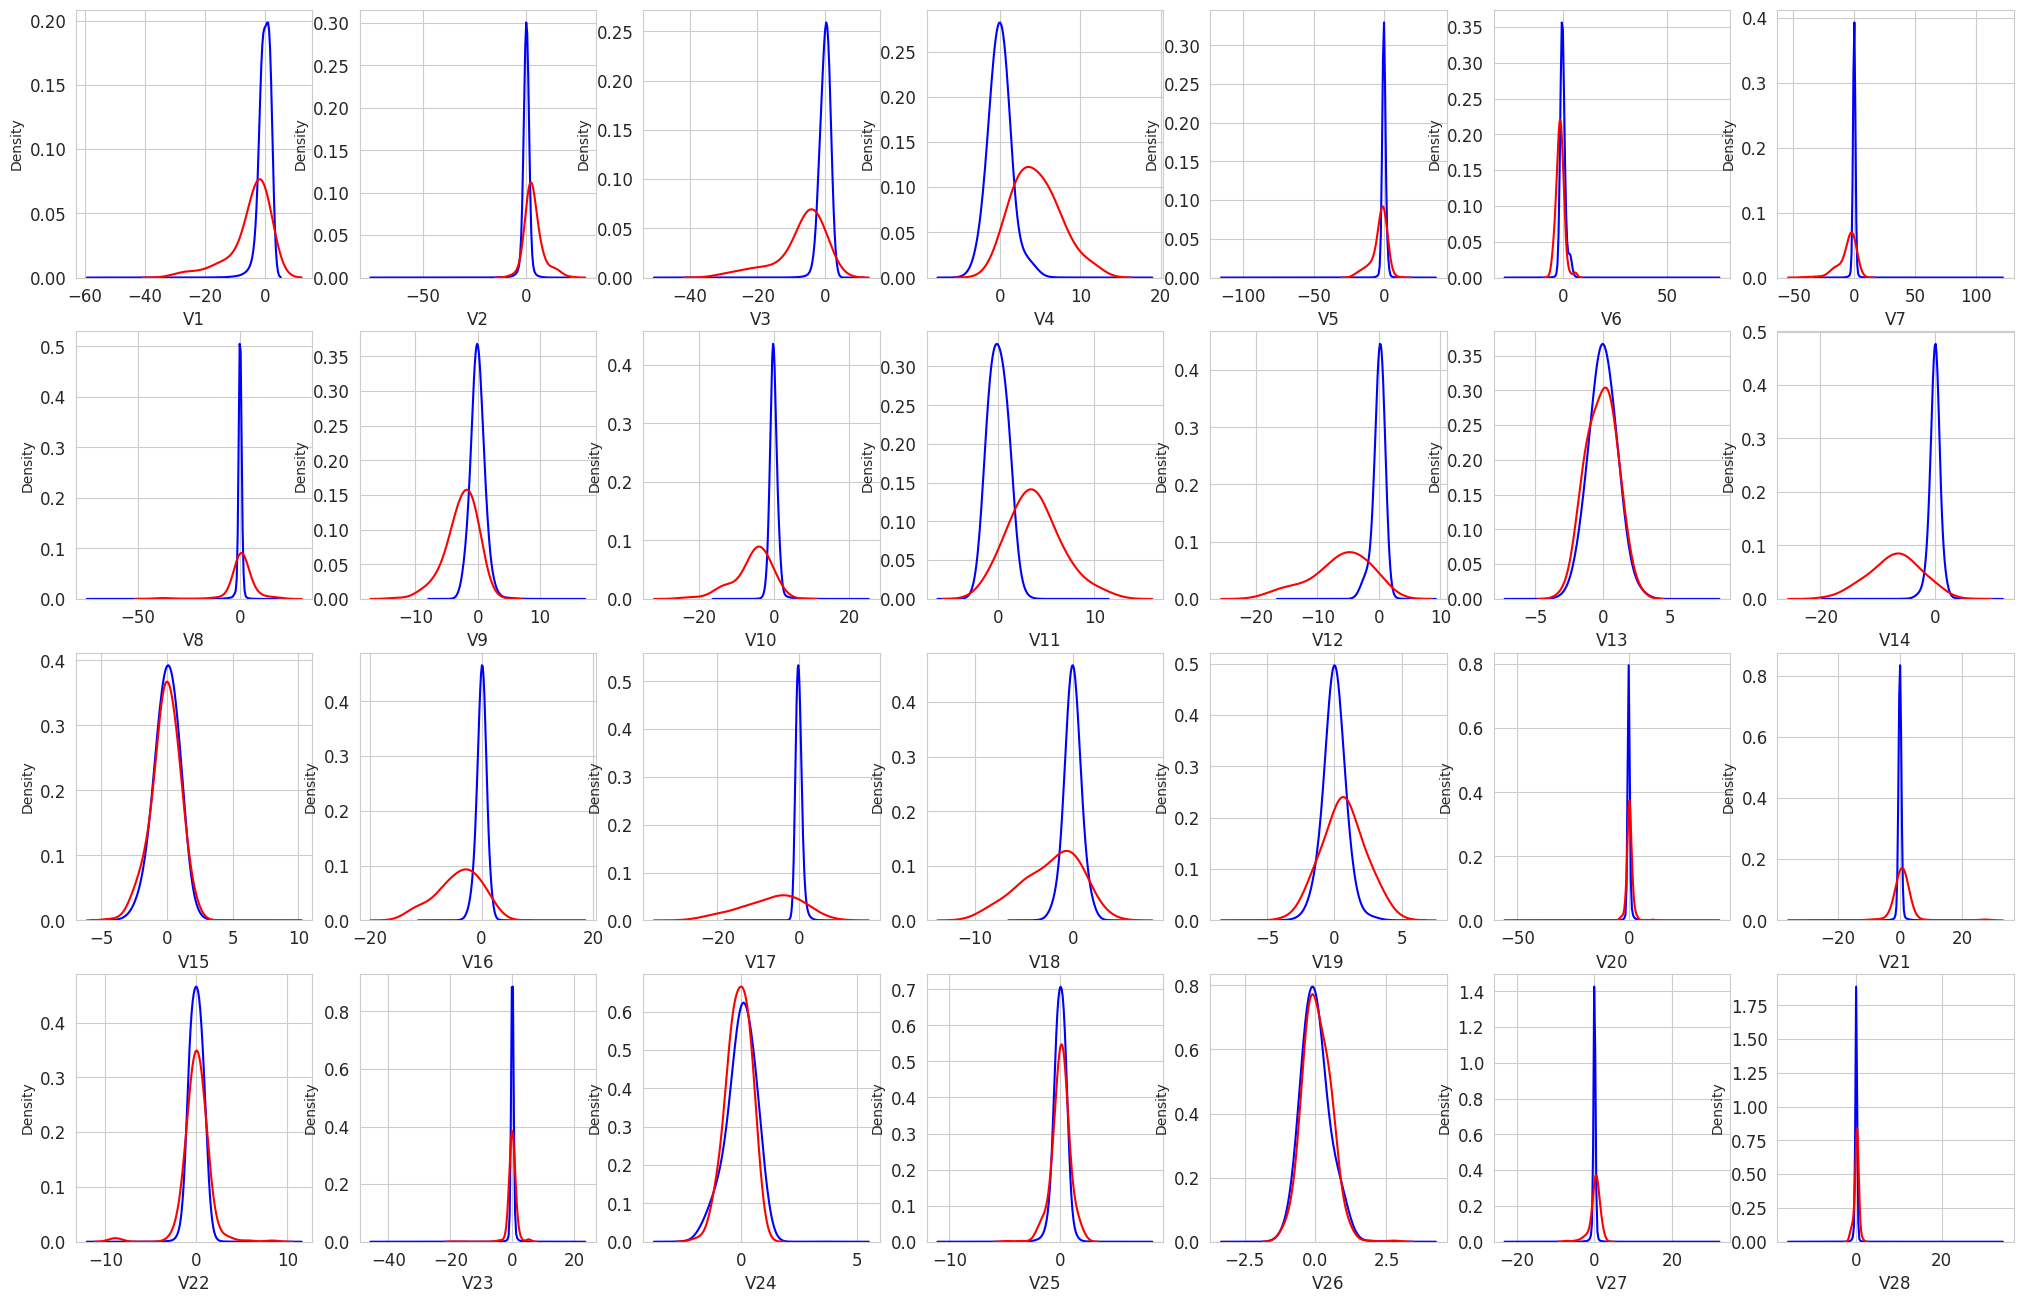

In [10]:
var = data.columns.values

i = 0
t0 = data.loc[data['Class'] == 0]
t1 = data.loc[data['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(4,7,figsize=(25, 16))

for feature in var[1:29]:
    i += 1
    plt.subplot(4,7,i)
    sns.kdeplot(t0[feature], bw_method=0.5,label="Class = 0", color = 'blue')
    sns.kdeplot(t1[feature], bw_method=0.5,label="Class = 1", color = 'red')
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

# 2.1 Data Preparation

In [5]:
# Drop Time
data = data.drop(['Time'], axis=1)

X = np.array(data.iloc[:, data.columns != 'Class'])
y = np.array(data.iloc[:, data.columns == 'Class'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

print("Label '1': {}".format(sum(y==1)[0]))
print("Label '0': {} \n".format(sum(y==0)[0]))

data.head()

Shape of X: (284807, 29)
Shape of y: (284807, 1)
Label '1': 492
Label '0': 284315 



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Train test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Normalize 'Amount'
amount_scaler = StandardScaler()
amount_scaler.fit(np.array(X_train[:, -1].reshape(-1, 1)))
X_train[:, -1] = np.squeeze(amount_scaler.transform(np.array(X_train[:, -1]).reshape(-1, 1)))
X_test[:, -1] = np.squeeze(amount_scaler.transform(X_test[:, -1].reshape(-1, 1)))

print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("train label '1': {}".format(sum(y_train==1)[0]))
print("train label '0': {} \n".format(sum(y_train==0)[0]))


print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)
print("test label '1': {}".format(sum(y_test==1)[0]))
print("test label '0': {} \n".format(sum(y_test==0)[0]))

X_train dataset:  (199364, 29)
y_train dataset:  (199364, 1)
train label '1': 345
train label '0': 199019 

X_test dataset:  (85443, 29)
y_test dataset:  (85443, 1)
test label '1': 147
test label '0': 85296 



# 2.2 Re-Sampling Methods

## 2.2.1 Cluster Centroid Under-sampling

In [7]:
cc = ClusterCentroids()
X_train_under, y_train_under = cc.fit_resample(X_train, y_train)
X_train_under, y_train_under = jnp.array(X_train_under), jnp.array(y_train_under).reshape(-1, 1)

print('After UnderSampling, the shape of train_X: {}'.format(X_train_under.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_under.shape))

print("After UnderSampling, counts of label '1': {}".format(sum(y_train_under==1)))
print("After UnderSampling, counts of label '0': {}".format(sum(y_train_under==0)))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


After UnderSampling, the shape of train_X: (690, 29)
After UnderSampling, the shape of train_y: (690, 1) 

After UnderSampling, counts of label '1': [345]
After UnderSampling, counts of label '0': [345]


## 2.2.2 Random Over-sampling

In [8]:
# random_oversample in jax
def random_oversample(X, y, seed=0):
    fraud = jnp.where(y == 1)[0]
    nonfraud = jnp.where(y == 0)[0]
    n_samples_to_add = len(nonfraud) - len(fraud)

    rng = random.PRNGKey(seed)

    indices_to_add = random.choice(rng, fraud, shape=(n_samples_to_add,))

    # Concatenate original and resampled data
    X_resampled = jnp.concatenate((X, X[indices_to_add]), axis=0)
    y_resampled = jnp.concatenate((y, y[indices_to_add]), axis=0)

    return X_resampled, y_resampled

X_train_random_over, y_train_random_over = random_oversample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_random_over.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_random_over.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_random_over==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_random_over==0)))

After OverSampling, the shape of train_X: (398038, 29)
After OverSampling, the shape of train_y: (398038, 1) 

After OverSampling, counts of label '1': [199019]
After OverSampling, counts of label '0': [199019]


## 2.2.3 SMOTE (Synthetic Minority Over-sampling Technique)

In [9]:
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
X_train_smote, y_train_smote = jnp.array(X_train_smote), jnp.array(y_train_smote).reshape(-1, 1)

print('After OverSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_smote==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_smote==0)))

After OverSampling, the shape of train_X: (398038, 29)
After OverSampling, the shape of train_y: (398038, 1) 

After OverSampling, counts of label '1': [199019]
After OverSampling, counts of label '0': [199019]


# 2.3 Machine Learning Models

## 2.3.1 Logistic Regression

In [73]:
def sigmoid(x):
    return 1/(1+jnp.exp(-x))

def logistic_regression(params, x):
    return sigmoid(jnp.dot(x, params))

def binary_cross_entropy_loss(params, x, y):
    y_pred = logistic_regression(params, x)
    loss = -jnp.mean(y * jnp.log(y_pred) + (1 - y) * jnp.log(1 - y_pred))
    return loss

def accuracy(params, x, y, threshold=0.5):
    y_pred = logistic_regression(params, x)
    y_pred_labels = jnp.where(y_pred > threshold, 1, 0)
    return jnp.mean(y_pred_labels == y)

def recall(params, x, y, threshold=0.5, title=''):
    y_pred = logistic_regression(params, x)
    y_pred_labels = jnp.where(y_pred > threshold, 1, 0)
    
    cm = confusion_matrix(y, y_pred_labels)
    cmp = ConfusionMatrixDisplay(confusion_matrix=cm)
    fig, ax = plt.subplots(figsize=(2,2))
    cmp.plot(ax = ax, colorbar=False)
    cmp.ax_.set_title(title)
    plt.show()

    tn, fp, fn, tp = cm.ravel()
    return tp / (tp + fn)

def roc_auc(params, x, y):
    y_pred = logistic_regression(params, x)
    fpr, tpr, thresholds = roc_curve(y, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    return roc_auc, fpr, tpr, thresholds

Epoch 0, Loss: 0.6931471824645996
Epoch 50, Loss: 0.6906405091285706
Epoch 100, Loss: 0.689353346824646


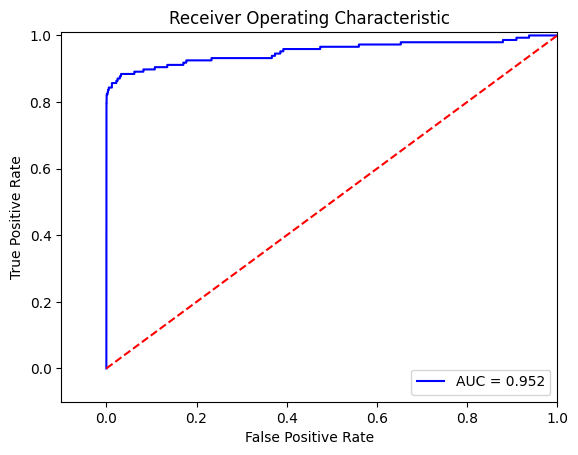

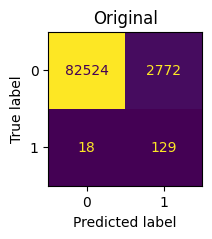

Test Accuracy: 0.9673466682434082
Test Recall: 0.8775510204081632
Test ROC AUC: 0.9519677055778228


In [74]:
# Initialize logistic regression parameters and optimizer
input_size = X_train.shape[1]
output_size = 1
params = jnp.zeros((input_size, output_size))
opt_init, opt_update, get_params = optimizers.adam(step_size=0.001)
opt_state = opt_init(params)

# Define training function
@jit
def train_step(i, opt_state, x, y):
    params = get_params(opt_state)
    loss, grad = value_and_grad(binary_cross_entropy_loss)(params, x, y)
    return loss, opt_update(i, grad, opt_state)

# Train model
for i in range(150):
    loss, opt_state = train_step(i, opt_state, X_train, y_train)
    if i % 50 == 0:
        print(f'Epoch {i}, Loss: {loss}')

roc_auc_test, fpr, tpr, thresholds = roc_auc(get_params(opt_state), X_test, y_test)
roc_auc_test_original, fpr_original, tpr_original = roc_auc_test, fpr, tpr
optimal_idx = jnp.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

accuracy_test = accuracy(get_params(opt_state), X_test, y_test, optimal_threshold)
recall_test = recall(get_params(opt_state), X_test, y_test, optimal_threshold, 'Original')

accuracy_test_original, recall_test_original = accuracy_test, recall_test

# Print results
print(f'Test Accuracy: {accuracy_test}')
print(f'Test Recall: {recall_test}')
print(f'Test ROC AUC: {roc_auc_test}')

### 2.3.1.1 Cluster Centroid Under-sampling

Epoch 0, Loss: 0.6931473016738892
Epoch 50, Loss: 0.447930246591568
Epoch 100, Loss: 0.4108242392539978
Epoch 150, Loss: 0.39229512214660645
Epoch 200, Loss: 0.38078704476356506
Epoch 250, Loss: 0.3731541335582733


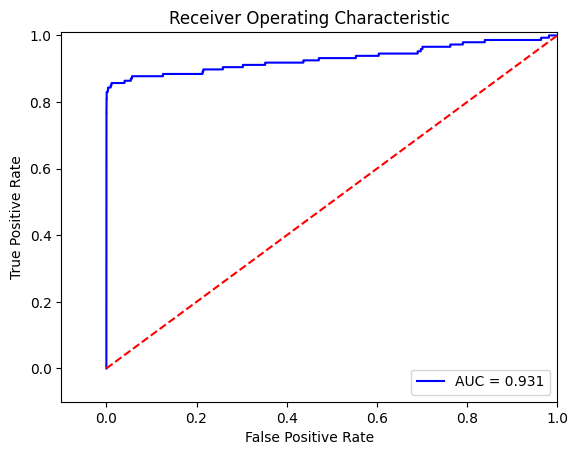

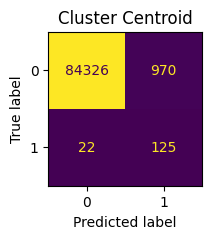

Test Accuracy: 0.9883899092674255
Test Recall: 0.8503401360544217
Test ROC AUC: 0.9309274098872338


In [75]:
# Initialize logistic regression parameters and optimizer
input_size = X_train.shape[1]
output_size = 1
params = jnp.zeros((input_size, output_size))
opt_init, opt_update, get_params = optimizers.adam(step_size=0.001)
opt_state = opt_init(params)

# Define training function
@jit
def train_step(i, opt_state, x, y):
    params = get_params(opt_state)
    loss, grad = value_and_grad(binary_cross_entropy_loss)(params, x, y)
    return loss, opt_update(i, grad, opt_state)

# Train model
for i in range(300):
    loss, opt_state = train_step(i, opt_state, X_train_under, y_train_under)
    if i % 50 == 0:
        print(f'Epoch {i}, Loss: {loss}')

roc_auc_test, fpr, tpr, thresholds = roc_auc(get_params(opt_state), X_test, y_test)
roc_auc_test_under, fpr_under, tpr_under = roc_auc_test, fpr, tpr
optimal_idx = jnp.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

accuracy_test = accuracy(get_params(opt_state), X_test, y_test, optimal_threshold)
recall_test = recall(get_params(opt_state), X_test, y_test, optimal_threshold, 'Cluster Centroid')

accuracy_test_under, recall_test_under = accuracy_test, recall_test

# Print results
print(f'Test Accuracy: {accuracy_test}')
print(f'Test Recall: {recall_test}')
print(f'Test ROC AUC: {roc_auc_test}')

### 2.3.1.2 Random Over-sampling

Epoch 0, Loss: 0.6931472420692444
Epoch 50, Loss: 0.4520534873008728
Epoch 100, Loss: 0.4256012439727783
Epoch 150, Loss: 0.4137211740016937
Epoch 200, Loss: 0.4066590368747711
Epoch 250, Loss: 0.4019263684749603


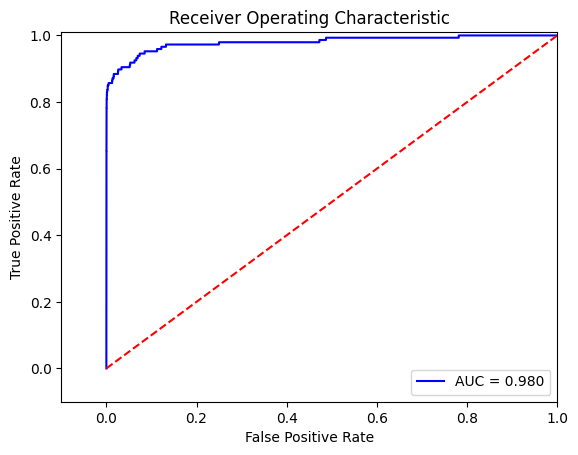

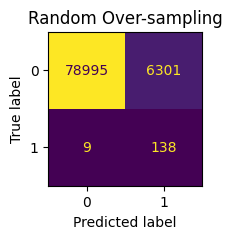

Test Accuracy: 0.9261496067047119
Test Recall: 0.9387755102040817
Test ROC AUC: 0.9796075084507636


In [76]:
# Initialize logistic regression parameters and optimizer
input_size = X_train.shape[1]
output_size = 1
params = jnp.zeros((input_size, output_size))
opt_init, opt_update, get_params = optimizers.adam(step_size=0.001)
opt_state = opt_init(params)

# Define training function
@jit
def train_step(i, opt_state, x, y):
    params = get_params(opt_state)
    loss, grad = value_and_grad(binary_cross_entropy_loss)(params, x, y)
    return loss, opt_update(i, grad, opt_state)

# Train model
for i in range(300):
    loss, opt_state = train_step(i, opt_state, X_train_random_over, y_train_random_over)
    if i % 50 == 0:
        print(f'Epoch {i}, Loss: {loss}')

roc_auc_test, fpr, tpr, thresholds = roc_auc(get_params(opt_state), X_test, y_test)
roc_auc_test_random_over, fpr_random_over, tpr_random_over = roc_auc_test, fpr, tpr
optimal_idx = jnp.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

accuracy_test = accuracy(get_params(opt_state), X_test, y_test, optimal_threshold)
recall_test = recall(get_params(opt_state), X_test, y_test, optimal_threshold, 'Random Over-sampling')
accuracy_test_random_over, recall_test_random_over = accuracy_test, recall_test

# Print results
print(f'Test Accuracy: {accuracy_test}')
print(f'Test Recall: {recall_test}')
print(f'Test ROC AUC: {roc_auc_test}')

### 2.3.1.3 SMOTE

Epoch 0, Loss: 0.6931472420692444
Epoch 50, Loss: 0.4520939588546753
Epoch 100, Loss: 0.4257095456123352
Epoch 150, Loss: 0.41390085220336914
Epoch 200, Loss: 0.4068787395954132
Epoch 250, Loss: 0.4021611213684082


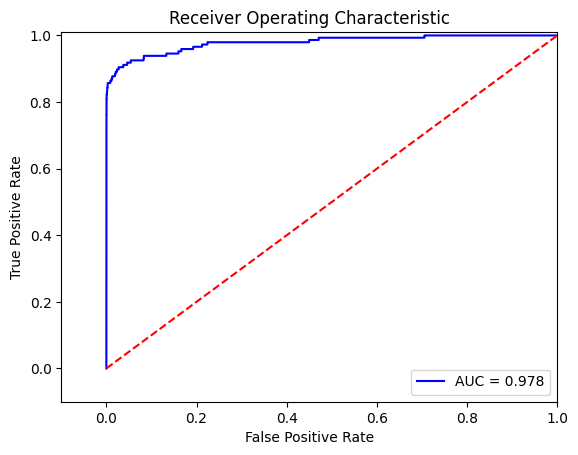

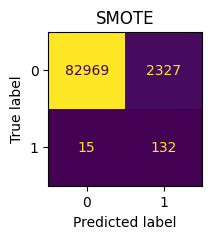

Test Accuracy: 0.972589910030365
Test Recall: 0.8979591836734694
Test ROC AUC: 0.9784505928614178


In [77]:
# Initialize logistic regression parameters and optimizer
input_size = X_train.shape[1]
output_size = 1
params = jnp.zeros((input_size, output_size))
opt_init, opt_update, get_params = optimizers.adam(step_size=0.001)
opt_state = opt_init(params)

# Define training function
@jit
def train_step(i, opt_state, x, y):
    params = get_params(opt_state)
    loss, grad = value_and_grad(binary_cross_entropy_loss)(params, x, y)
    return loss, opt_update(i, grad, opt_state)

# Train model
for i in range(300):
    loss, opt_state = train_step(i, opt_state, X_train_smote, y_train_smote)
    if i % 50 == 0:
        print(f'Epoch {i}, Loss: {loss}')

roc_auc_test, fpr, tpr, thresholds = roc_auc(get_params(opt_state), X_test, y_test)
roc_auc_test_smote, fpr_smote, tpr_smote = roc_auc_test, fpr, tpr
optimal_idx = jnp.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

accuracy_test = accuracy(get_params(opt_state), X_test, y_test, optimal_threshold)
recall_test = recall(get_params(opt_state), X_test, y_test, optimal_threshold, 'SMOTE')

accuracy_test_smote, recall_test_smote = accuracy_test, recall_test

# Print results
print(f'Test Accuracy: {accuracy_test}')
print(f'Test Recall: {recall_test}')
print(f'Test ROC AUC: {roc_auc_test}')

### 2.3.1.4 Summary

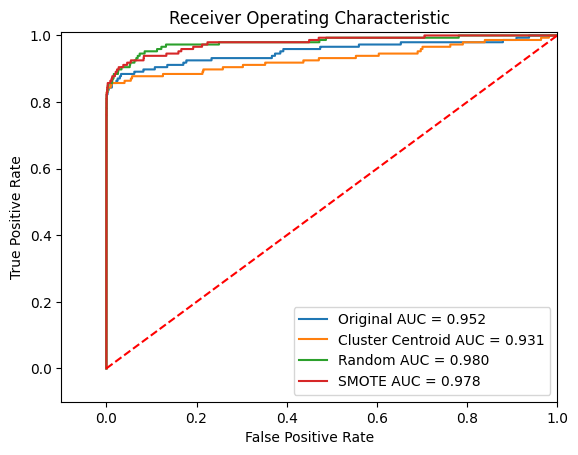

In [95]:
plt.plot(fpr_original, tpr_original,label='Original AUC = %0.3f'% roc_auc_test_original)
plt.plot(fpr_under, tpr_under,label='Cluster Centroid AUC = %0.3f'% roc_auc_test_under)
plt.plot(fpr_random_over, tpr_random_over,label='Random AUC = %0.3f'% roc_auc_test_random_over)
plt.plot(fpr_smote, tpr_smote,label='SMOTE AUC = %0.3f'% roc_auc_test_smote)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.title('Receiver Operating Characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [86]:
result = [['Accuracy', "{0:.4%}".format(accuracy_test_original), "{0:.4%}".format(accuracy_test_under), "{0:.4%}".format(accuracy_test_random_over), "{0:.4%}".format(accuracy_test_smote)],
          ['Recall', "{0:.4%}".format(recall_test_original), "{0:.4%}".format(recall_test_under), "{0:.4%}".format(recall_test_random_over), "{0:.4%}".format(recall_test_smote)],
          ['AUC', "{0:.4%}".format(roc_auc_test_original), "{0:.4%}".format(roc_auc_test_under), "{0:.4%}".format(roc_auc_test_random_over), "{0:.4%}".format(roc_auc_test_smote)]]
headers = ['Metrics', 'Original', 'Cluster Centroid', 'Random Oversampling', 'SMOTE']
print(tabulate(result, headers, tablefmt="pretty"))

+----------+----------+------------------+---------------------+----------+
| Metrics  | Original | Cluster Centroid | Random Oversampling |  SMOTE   |
+----------+----------+------------------+---------------------+----------+
| Accuracy | 96.7347% |     98.8390%     |      92.6150%       | 97.2590% |
|  Recall  | 87.7551% |     85.0340%     |      93.8776%       | 89.7959% |
|   AUC    | 95.1968% |     93.0927%     |      97.9608%       | 97.8451% |
+----------+----------+------------------+---------------------+----------+


## 2.3.2 XGBoost

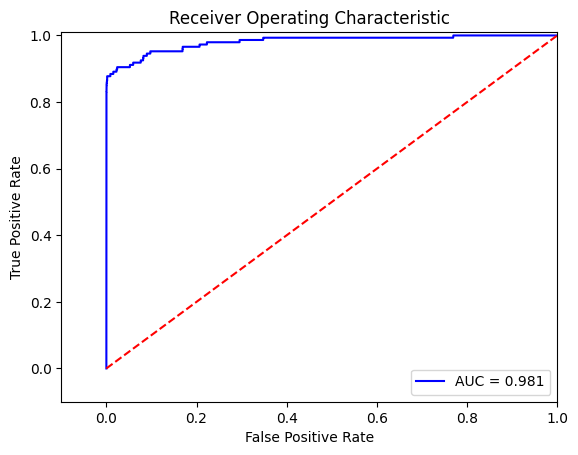

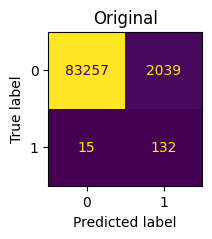

Test Accuracy: 0.9759605526924133
Test Recall: 0.8979591836734694
Test ROC AUC: 0.9809671594205118


In [96]:
# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth': 5,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eta': 0.1,
    'verbosity': 0,
}

# Train XGBoost model
num_round = 100
bst = xgb.train(params, dtrain, num_round)

# Make predictions on test set
dtest = xgb.DMatrix(X_test)
y_pred = bst.predict(dtest)

# Calculate performance metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc_test = auc(fpr, tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc_test)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

optimal_idx = jnp.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
y_pred_labels = jnp.where(y_pred > optimal_threshold, 1, 0).reshape(-1,1)

cm = confusion_matrix(y_test, y_pred_labels)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(2,2))
cmp.plot(ax = ax, colorbar=False)
cmp.ax_.set_title('Original')
plt.show()

accuracy_test = jnp.mean(y_test == y_pred_labels)
recall_test = recall_score(y_test, y_pred_labels)

roc_auc_test_original, fpr_original, tpr_original = roc_auc_test, fpr, tpr
accuracy_test_original, recall_test_original = accuracy_test, recall_test

# Print results
print(f'Test Accuracy: {accuracy_test}')
print(f'Test Recall: {recall_test}')
print(f'Test ROC AUC: {roc_auc_test}')

### 2.3.2.1 Cluster Centroid Under-sampling

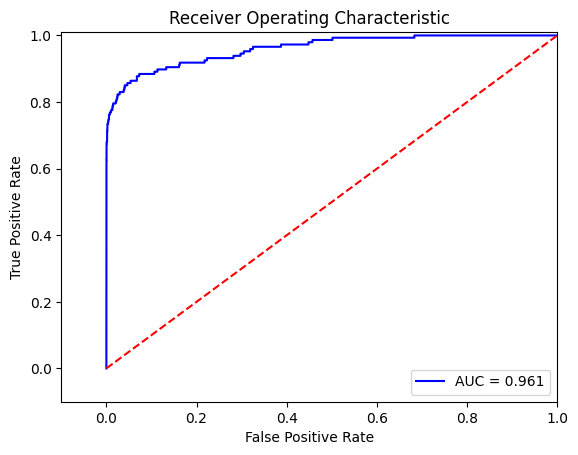

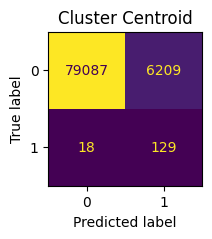

Test Accuracy: 0.9271209836006165
Test Recall: 0.8775510204081632
Test ROC AUC: 0.96073078687487


In [97]:
# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_under, label=y_train_under)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth': 5,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eta': 0.1,
    'verbosity': 0,
}

# Train XGBoost model
num_round = 100
bst = xgb.train(params, dtrain, num_round)

# Make predictions on test set
dtest = xgb.DMatrix(X_test)
y_pred = bst.predict(dtest)

# Calculate performance metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc_test = auc(fpr, tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc_test)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

optimal_idx = jnp.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
y_pred_labels = jnp.where(y_pred > optimal_threshold, 1, 0).reshape(-1,1)

cm = confusion_matrix(y_test, y_pred_labels)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(2,2))
cmp.plot(ax = ax, colorbar=False)
cmp.ax_.set_title('Cluster Centroid')
plt.show()

accuracy_test = jnp.mean(y_test == y_pred_labels)
recall_test = recall_score(y_test, y_pred_labels)

roc_auc_test_under, fpr_under, tpr_under = roc_auc_test, fpr, tpr
accuracy_test_under, recall_test_under = accuracy_test, recall_test

# Print results
print(f'Test Accuracy: {accuracy_test}')
print(f'Test Recall: {recall_test}')
print(f'Test ROC AUC: {roc_auc_test}')

### 2.3.2.2 Random Over-sampling

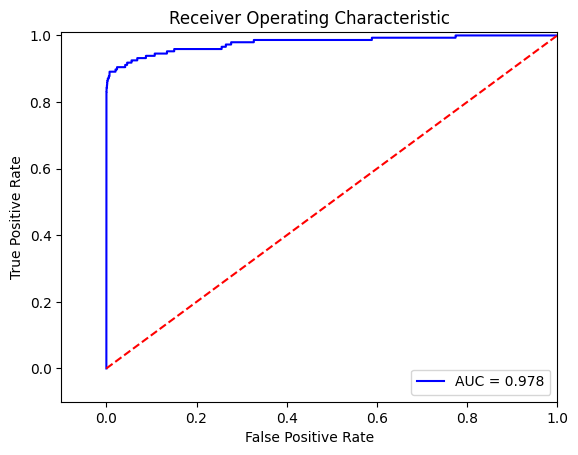

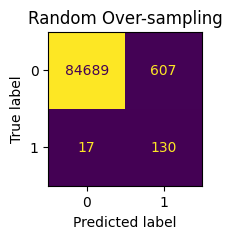

Test Accuracy: 0.9926968812942505
Test Recall: 0.8843537414965986
Test ROC AUC: 0.9778571811391974


In [98]:
# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_random_over, label=y_train_random_over)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth': 5,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eta': 0.1,
    'verbosity': 0,
}

# Train XGBoost model
num_round = 100
bst = xgb.train(params, dtrain, num_round)

# Make predictions on test set
dtest = xgb.DMatrix(X_test)
y_pred = bst.predict(dtest)

# Calculate performance metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc_test = auc(fpr, tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc_test)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

optimal_idx = jnp.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
y_pred_labels = jnp.where(y_pred > optimal_threshold, 1, 0).reshape(-1,1)

cm = confusion_matrix(y_test, y_pred_labels)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(2,2))
cmp.plot(ax = ax, colorbar=False)
cmp.ax_.set_title('Random Over-sampling')
plt.show()

accuracy_test = jnp.mean(y_test == y_pred_labels)
recall_test = recall_score(y_test, y_pred_labels)

roc_auc_test_random_over, fpr_random_over, tpr_random_over = roc_auc_test, fpr, tpr
accuracy_test_random_over, recall_test_random_over = accuracy_test, recall_test

# Print results
print(f'Test Accuracy: {accuracy_test}')
print(f'Test Recall: {recall_test}')
print(f'Test ROC AUC: {roc_auc_test}')

### 2.3.2.3 SMOTE

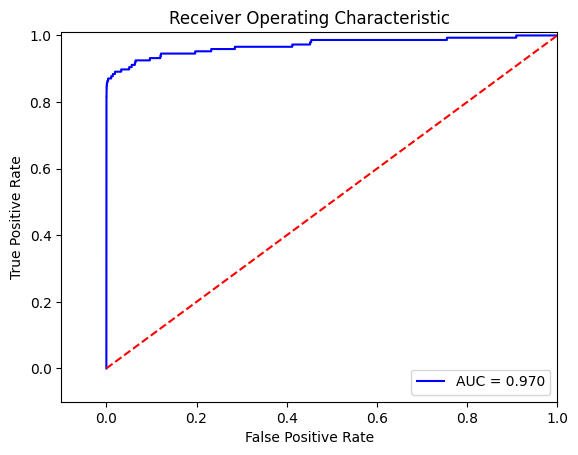

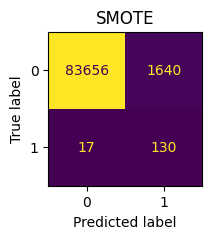

Test Accuracy: 0.9806069731712341
Test Recall: 0.8843537414965986
Test ROC AUC: 0.9703525027531178


In [99]:
# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_smote, label=y_train_smote)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth': 5,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eta': 0.1,
    'verbosity': 0,
}

# Train XGBoost model
num_round = 100
bst = xgb.train(params, dtrain, num_round)

# Make predictions on test set
dtest = xgb.DMatrix(X_test)
y_pred = bst.predict(dtest)

# Calculate performance metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc_test = auc(fpr, tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc_test)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

optimal_idx = jnp.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
y_pred_labels = jnp.where(y_pred > optimal_threshold, 1, 0).reshape(-1,1)

cm = confusion_matrix(y_test, y_pred_labels)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(2,2))
cmp.plot(ax = ax, colorbar=False)
cmp.ax_.set_title('SMOTE')
plt.show()

accuracy_test = jnp.mean(y_test == y_pred_labels)
recall_test = recall_score(y_test, y_pred_labels)

roc_auc_test_smote, fpr_smote, tpr_smote = roc_auc_test, fpr, tpr
accuracy_smote, recall_smote = accuracy_test, recall_test

# Print results
print(f'Test Accuracy: {accuracy_test}')
print(f'Test Recall: {recall_test}')
print(f'Test ROC AUC: {roc_auc_test}')

### 2.3.2.4 Summary

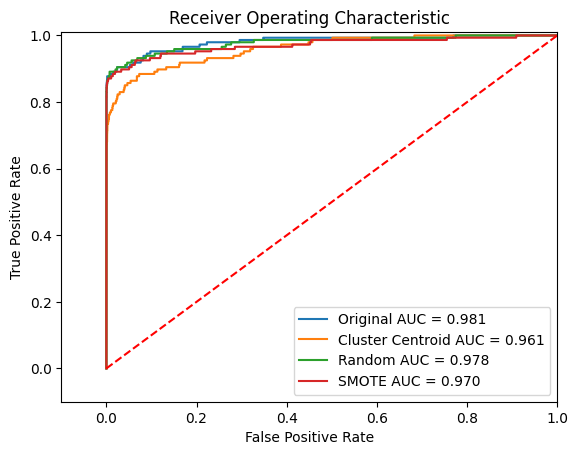

In [100]:
plt.plot(fpr_original, tpr_original,label='Original AUC = %0.3f'% roc_auc_test_original)
plt.plot(fpr_under, tpr_under,label='Cluster Centroid AUC = %0.3f'% roc_auc_test_under)
plt.plot(fpr_random_over, tpr_random_over,label='Random AUC = %0.3f'% roc_auc_test_random_over)
plt.plot(fpr_smote, tpr_smote,label='SMOTE AUC = %0.3f'% roc_auc_test_smote)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.title('Receiver Operating Characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [101]:
result = [['Accuracy', "{0:.4%}".format(accuracy_test_original), "{0:.4%}".format(accuracy_test_under), "{0:.4%}".format(accuracy_test_random_over), "{0:.4%}".format(accuracy_test_smote)],
          ['Recall', "{0:.4%}".format(recall_test_original), "{0:.4%}".format(recall_test_under), "{0:.4%}".format(recall_test_random_over), "{0:.4%}".format(recall_test_smote)],
          ['AUC', "{0:.4%}".format(roc_auc_test_original), "{0:.4%}".format(roc_auc_test_under), "{0:.4%}".format(roc_auc_test_random_over), "{0:.4%}".format(roc_auc_test_smote)]]
headers = ['Metrics', 'Original', 'Cluster Centroid', 'Random Oversampling', 'SMOTE']
print(tabulate(result, headers, tablefmt="pretty"))

+----------+----------+------------------+---------------------+----------+
| Metrics  | Original | Cluster Centroid | Random Oversampling |  SMOTE   |
+----------+----------+------------------+---------------------+----------+
| Accuracy | 97.5961% |     92.7121%     |      99.2697%       | 97.2590% |
|  Recall  | 89.7959% |     87.7551%     |      88.4354%       | 89.7959% |
|   AUC    | 98.0967% |     96.0731%     |      97.7857%       | 97.0353% |
+----------+----------+------------------+---------------------+----------+


## 2.3.3 MLP

In [79]:
def MLP(layers, activation=relu):
  def init(rng_key):
      def init_layer(key, d_in, d_out):
          k1, k2 = random.split(key)
          glorot_stddev = 1. / jnp.sqrt((d_in + d_out) / 2.)
          W = glorot_stddev * random.normal(k1, (d_in, d_out))
          b = jnp.zeros(d_out)
          return W, b
      key, *keys = random.split(rng_key, len(layers))
      params = list(map(init_layer, keys, layers[:-1], layers[1:]))
      return params
  def apply(params, inputs):
      for W, b in params[:-1]:
          outputs = jnp.dot(inputs, W) + b
          inputs = activation(outputs)
      W, b = params[-1]
      outputs = jnp.dot(inputs, W) + b
      return outputs
  return init, apply

@optimizers.optimizer
def sgd(step_size):
    step_size = optimizers.make_schedule(step_size)
    def init(x0):
        return x0
    def update(i, g, x):
        return x - step_size(i) * g
    def get_params(x):
        return x
    return init, update, get_params

@optimizers.optimizer
def adam(step_size, b1=0.9, b2=0.999, eps=1e-8):
    step_size = optimizers.make_schedule(step_size)
    def init(x0):
        m0 = jnp.zeros_like(x0)
        v0 = jnp.zeros_like(x0)
        return x0, m0, v0
    def update(i, g, state):
        x, m, v = state
        m = (1 - b1) * g + b1 * m  # First  moment estimate.
        v = (1 - b2) * jnp.square(g) + b2 * v  # Second moment estimate.
        mhat = m / (1 - jnp.asarray(b1, m.dtype) ** (i + 1))  # Bias correction.
        vhat = v / (1 - jnp.asarray(b2, m.dtype) ** (i + 1))
        x = x - step_size(i) * mhat / (jnp.sqrt(vhat) + eps)
        return x, m, v
    def get_params(state):
        x, _, _ = state
        return x
    return init, update, get_params

rng_model = random.PRNGKey(0)
rng_dataloader = random.PRNGKey(42)

class MLPregression:
    # Initialize the class
    def __init__(self, layers, rng_key):
        # MLP init and apply functions
        self.net_init, self.net_apply = MLP(layers)
        params = self.net_init(rng_key)

        # Optimizer initialization and update functions
        lr = optimizers.exponential_decay(1e-3, decay_steps=1000, decay_rate=0.999)
        self.opt_init, \
        self.opt_update, \
        self.get_params = adam(lr)
        self.opt_state = self.opt_init(params)

        # Logger
        self.itercount = itertools.count()
        self.train_loss = []
        self.train_recall = []
        self.train_accuracy = []
        self.test_loss = []
        self.test_recall = []
        self.test_accuracy = []
        
    @partial(jit, static_argnums=(0,))
    def loss(self, params, batch):
        inputs, targets = batch
        outputs = self.net_apply(params, inputs)
        loss = jnp.mean(-targets * log_sigmoid(outputs) * 99 - (1. - targets) * log_sigmoid(-outputs) * 1)        
        return loss 

    @partial(jit, static_argnums=(0,))
    def accuracy(self, params, batch):
        inputs, targets = batch
        outputs = self.net_apply(params, inputs)
        outputs = jnp.round(sigmoid(outputs))
        acc = jnp.mean(outputs == targets)
        return acc

    @partial(jit, static_argnums=(0,))
    def recall(self, params, batch):
        inputs, targets = batch
        outputs = self.net_apply(params, inputs)
        outputs = jnp.round(sigmoid(outputs))
        # print(type(np.asarray(targets)), type(np.asarray(outputs)))
        # rec = recall_score(np.asarray(targets), np.asarray(outputs))
        tp = jnp.sum((targets * 2 + 1)/3 == outputs)
        fn = jnp.sum(targets == outputs + 1)
        rec = tp / (tp + fn)
        return rec

    @partial(jit, static_argnums=(0,))
    def step(self, i, opt_state, batch):
        params = self.get_params(opt_state)
        gradients = grad(self.loss)(params, batch)
        return self.opt_update(i, gradients, opt_state) 

    def train(self, dataset, test_dataset, nIter = 10):
        data = iter(dataset)
        test_data = iter(test_dataset)
        pbar = trange(nIter)
        # Main training loop
        for it in pbar:
            # Run one gradient descent update
            batch = next(data)
            self.opt_state = self.step(next(self.itercount), self.opt_state, batch)  
            if it % 50 == 0:
                # Logger
                test_batch = next(test_data)

                params = self.get_params(self.opt_state)

                train_loss = self.loss(params, batch)
                test_loss = self.loss(params, test_batch)
                # train_recall = self.recall(params, batch)
                # test_recall = self.recall(params, test_batch)
                train_accuracy = self.accuracy(params, batch)
                test_accuracy = self.accuracy(params, test_batch)

                self.train_loss.append(train_loss)
                self.test_loss.append(test_loss)
                # self.train_recall.append(train_recall)
                # self.test_recall.append(test_recall)
                self.train_accuracy.append(train_accuracy)
                self.test_accuracy.append(test_accuracy)

                pbar.set_postfix({'Train Loss': train_loss, 'Test Loss': test_loss, 
                                  #'Train Recall': train_recall, 'Test Recall': test_recall,
                                  'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy})

    @partial(jit, static_argnums=(0,))
    def predict(self, params, inputs):
        outputs = self.net_apply(params, inputs)
        return outputs

from torch.utils import data
class DataGenerator(data.Dataset):
    def __init__(self, X, Y, 
                 norm_const=((0.0, 1.0), (0.0, 1.0)), 
                 batch_size=128, 
                 rng_key = random.PRNGKey(123)):
        'Initialization'
        self.X = X
        self.Y = Y
        self.N = Y.shape[0]
        self.norm_const = norm_const
        self.batch_size = batch_size
        self.key = rng_key

    @partial(jit, static_argnums=(0,))
    def __data_generation(self, key, X, Y):
        'Generates data containing batch_size samples'
        (mu_X, sigma_X), (mu_Y, sigma_Y) = self.norm_const
        idx = random.choice(key, self.N, (self.batch_size,), replace=False)
        inputs = X[idx,:]
        targets = Y[idx,:]
        inputs = (inputs - mu_X)/sigma_X
        targets = (targets - mu_Y)/sigma_Y
        return inputs, targets

    def __getitem__(self, index):
        'Generate one batch of data'
        self.key, subkey = random.split(self.key)
        inputs, targets = self.__data_generation(self.key, self.X, self.Y)
        return inputs, targets

In [80]:
norm_const = (0, 1), (0, 1)
train_gen = DataGenerator(jnp.array(X_train), jnp.array(y_train), norm_const, batch_size=128, rng_key = rng_dataloader)
test_gen = DataGenerator(jnp.array(X_test), jnp.array(y_test), norm_const, batch_size=128, rng_key = rng_dataloader)

layers=[29, 64, 64, 1]
model = MLPregression(layers, rng_key = rng_model)
model.train(train_gen, test_gen, nIter=10000)

opt_params = model.get_params(model.opt_state)
y_pred = model.predict(opt_params, X_test)

100%|██████████| 10000/10000 [00:18<00:00, 533.65it/s, Train Loss=0.009264145, Test Loss=0.0050388332, Train Accuracy=1.0, Test Accuracy=1.0]


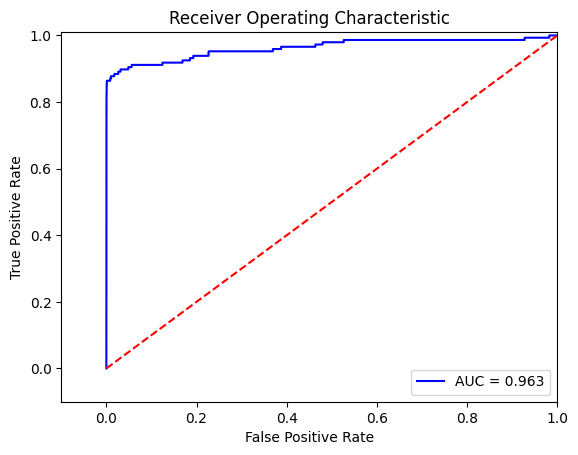

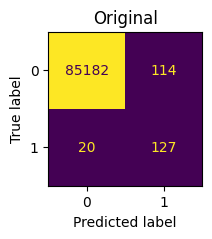

Test Accuracy: 0.9984316825866699
Test Recall: 0.8639455782312925
Test ROC AUC: 0.9627434260141874


In [82]:
# Calculate performance metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc_test = auc(fpr, tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc_test)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# optimal_idx = jnp.argmax(tpr - fpr)
# optimal_threshold = thresholds[optimal_idx]
# y_pred_labels = jnp.where(y_pred > optimal_threshold, 1, 0).reshape(-1,1)
y_pred_labels = jnp.round(sigmoid(y_pred))

cm = confusion_matrix(y_test, y_pred_labels)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(2,2))
cmp.plot(ax = ax, colorbar=False)
cmp.ax_.set_title('Original')
plt.show()

accuracy_test = jnp.mean(y_test == y_pred_labels)
recall_test = recall_score(y_test, y_pred_labels)

roc_auc_test_original, fpr_original, tpr_original = roc_auc_test, fpr, tpr
accuracy_test_original, recall_test_original = accuracy_test, recall_test

# Print results
print(f'Test Accuracy: {accuracy_test}')
print(f'Test Recall: {recall_test}')
print(f'Test ROC AUC: {roc_auc_test}')

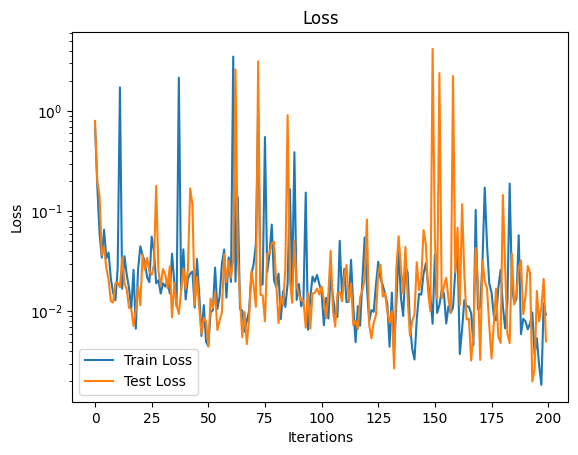

In [83]:
plt.plot(np.array(model.train_loss), label = 'Train Loss')
plt.plot(np.array(model.test_loss), label = 'Test Loss')
plt.title('Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.show()

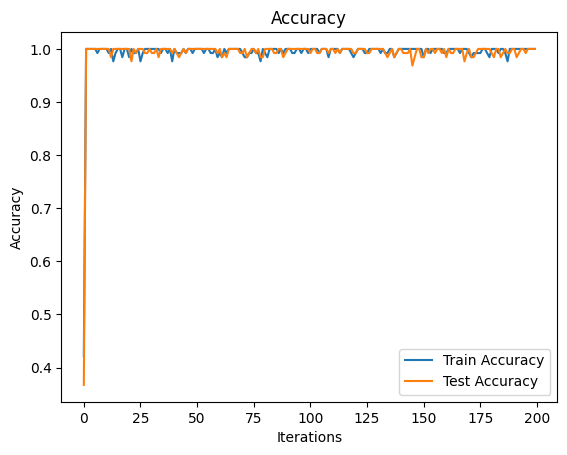

In [84]:
plt.plot(np.array(model.train_accuracy), label = 'Train Accuracy')
plt.plot(np.array(model.test_accuracy), label = 'Test Accuracy')
plt.title('Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 2.3.2.1 Cluster Centroid Under-sampling

In [85]:
norm_const = (0, 1), (0, 1)
train_gen = DataGenerator(jnp.array(X_train_under), jnp.array(y_train_under), norm_const, batch_size=128, rng_key = rng_dataloader)
test_gen = DataGenerator(jnp.array(X_test), jnp.array(y_test), norm_const, batch_size=128, rng_key = rng_dataloader)

layers=[29, 64, 64, 1]
model = MLPregression(layers, rng_key = rng_model)
model.train(train_gen, test_gen, nIter=10000)

opt_params = model.get_params(model.opt_state)
y_pred = model.predict(opt_params, X_test)

100%|██████████| 10000/10000 [00:14<00:00, 685.96it/s, Train Loss=6.3000443e-06, Test Loss=0.89964557, Train Accuracy=1.0, Test Accuracy=0.8828125]


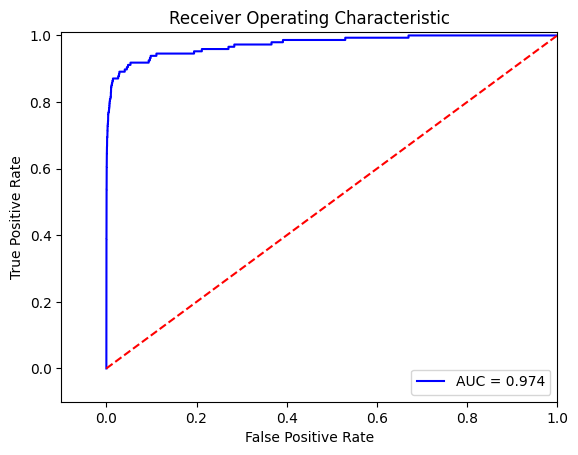

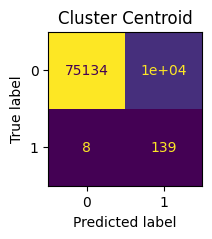

Test Accuracy: 0.8809732794761658
Test Recall: 0.9455782312925171
Test ROC AUC: 0.9741408310651216


In [86]:
# Calculate performance metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc_test = auc(fpr, tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc_test)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# optimal_idx = jnp.argmax(tpr - fpr)
# optimal_threshold = thresholds[optimal_idx]
# y_pred_labels = jnp.where(y_pred > optimal_threshold, 1, 0).reshape(-1,1)
y_pred_labels = jnp.round(sigmoid(y_pred))

cm = confusion_matrix(y_test, y_pred_labels)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(2,2))
cmp.plot(ax = ax, colorbar=False)
cmp.ax_.set_title('Cluster Centroid')
plt.show()

accuracy_test = jnp.mean(y_test == y_pred_labels)
recall_test = recall_score(y_test, y_pred_labels)

roc_auc_test_under, fpr_under, tpr_under = roc_auc_test, fpr, tpr
accuracy_test_under, recall_test_under = accuracy_test, recall_test

# Print results
print(f'Test Accuracy: {accuracy_test}')
print(f'Test Recall: {recall_test}')
print(f'Test ROC AUC: {roc_auc_test}')

### 2.3.2.2 Random Over-sampling

In [93]:
norm_const = (0, 1), (0, 1)
train_gen = DataGenerator(jnp.array(X_train_random_over), jnp.array(y_train_random_over), norm_const, batch_size=128, rng_key = rng_dataloader)
test_gen = DataGenerator(jnp.array(X_test), jnp.array(y_test), norm_const, batch_size=128, rng_key = rng_dataloader)

layers=[29, 64, 64, 1]
model = MLPregression(layers, rng_key = rng_model)
model.train(train_gen, test_gen, nIter=10000)

opt_params = model.get_params(model.opt_state)
y_pred = model.predict(opt_params, X_test)

100%|██████████| 10000/10000 [00:33<00:00, 299.06it/s, Train Loss=0.0009559644, Test Loss=0.0031204724, Train Accuracy=1.0, Test Accuracy=1.0]


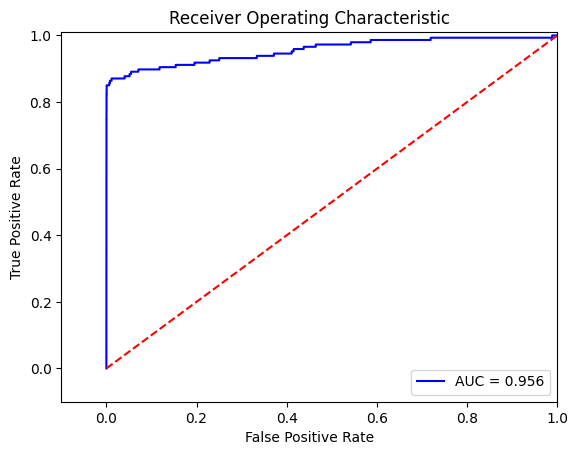

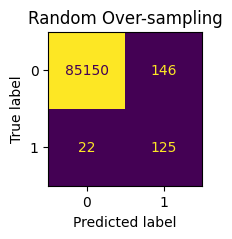

Test Accuracy: 0.9980337619781494
Test Recall: 0.8503401360544217
Test ROC AUC: 0.9559786679631522


In [94]:
# Calculate performance metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc_test = auc(fpr, tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc_test)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# optimal_idx = jnp.argmax(tpr - fpr)
# optimal_threshold = thresholds[optimal_idx]
# y_pred_labels = jnp.where(y_pred > optimal_threshold, 1, 0).reshape(-1,1)
y_pred_labels = jnp.round(sigmoid(y_pred))

cm = confusion_matrix(y_test, y_pred_labels)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(2,2))
cmp.plot(ax = ax, colorbar=False)
cmp.ax_.set_title('Random Over-sampling')
plt.show()

accuracy_test = jnp.mean(y_test == y_pred_labels)
recall_test = recall_score(y_test, y_pred_labels)

roc_auc_test_random_over, fpr_random_over, tpr_random_over = roc_auc_test, fpr, tpr
accuracy_test_random_over, recall_test_random_over = accuracy_test, recall_test

# Print results
print(f'Test Accuracy: {accuracy_test}')
print(f'Test Recall: {recall_test}')
print(f'Test ROC AUC: {roc_auc_test}')

### 2.3.2.3 SMOTE

In [95]:
norm_const = (0, 1), (0, 1)
train_gen = DataGenerator(jnp.array(X_train_smote), jnp.array(y_train_smote), norm_const, batch_size=128, rng_key = rng_dataloader)
test_gen = DataGenerator(jnp.array(X_test), jnp.array(y_test), norm_const, batch_size=128, rng_key = rng_dataloader)

layers=[29, 64, 64, 1]
model = MLPregression(layers, rng_key = rng_model)
model.train(train_gen, test_gen, nIter=10000)

opt_params = model.get_params(model.opt_state)
y_pred = model.predict(opt_params, X_test)

100%|██████████| 10000/10000 [00:27<00:00, 369.02it/s, Train Loss=0.00024786877, Test Loss=5.2616806e-06, Train Accuracy=1.0, Test Accuracy=1.0]


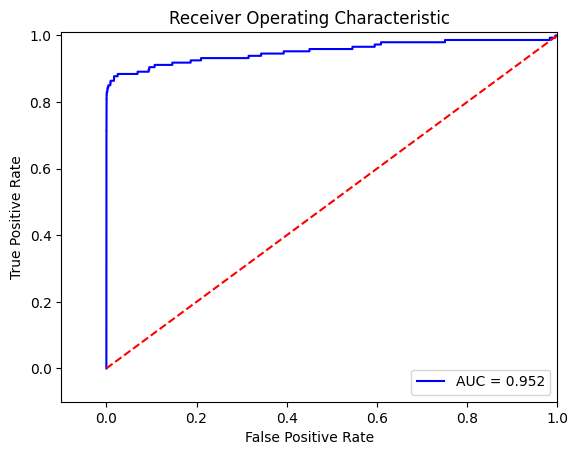

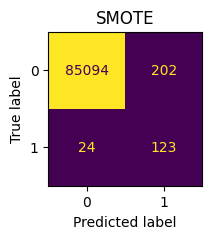

Test Accuracy: 0.9973549842834473
Test Recall: 0.8367346938775511
Test ROC AUC: 0.9524610256783261


In [96]:
# Calculate performance metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc_test = auc(fpr, tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc_test)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# optimal_idx = jnp.argmax(tpr - fpr)
# optimal_threshold = thresholds[optimal_idx]
# y_pred_labels = jnp.where(y_pred > optimal_threshold, 1, 0).reshape(-1,1)
y_pred_labels = jnp.round(sigmoid(y_pred))

cm = confusion_matrix(y_test, y_pred_labels)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(2,2))
cmp.plot(ax = ax, colorbar=False)
cmp.ax_.set_title('SMOTE')
plt.show()

accuracy_test = jnp.mean(y_test == y_pred_labels)
recall_test = recall_score(y_test, y_pred_labels)

roc_auc_test_smote, fpr_smote, tpr_smote = roc_auc_test, fpr, tpr
accuracy_test_smote, recall_test_smote = accuracy_test, recall_test

# Print results
print(f'Test Accuracy: {accuracy_test}')
print(f'Test Recall: {recall_test}')
print(f'Test ROC AUC: {roc_auc_test}')

### 2.3.2.4 Summary

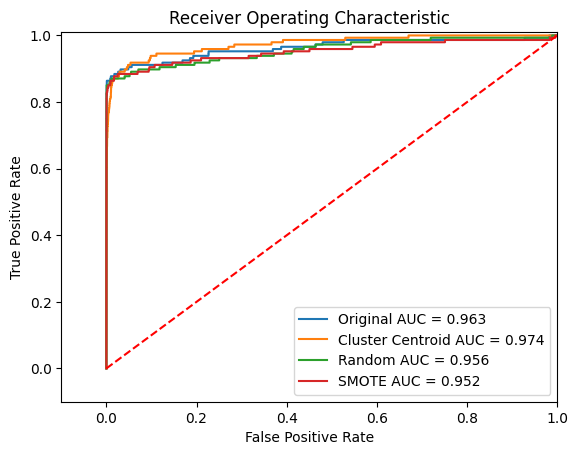

In [91]:
plt.plot(fpr_original, tpr_original,label='Original AUC = %0.3f'% roc_auc_test_original)
plt.plot(fpr_under, tpr_under,label='Cluster Centroid AUC = %0.3f'% roc_auc_test_under)
plt.plot(fpr_random_over, tpr_random_over,label='Random AUC = %0.3f'% roc_auc_test_random_over)
plt.plot(fpr_smote, tpr_smote,label='SMOTE AUC = %0.3f'% roc_auc_test_smote)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.title('Receiver Operating Characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [92]:
result = [['Accuracy', "{0:.4%}".format(accuracy_test_original), "{0:.4%}".format(accuracy_test_under), "{0:.4%}".format(accuracy_test_random_over), "{0:.4%}".format(accuracy_test_smote)],
          ['Recall', "{0:.4%}".format(recall_test_original), "{0:.4%}".format(recall_test_under), "{0:.4%}".format(recall_test_random_over), "{0:.4%}".format(recall_test_smote)],
          ['AUC', "{0:.4%}".format(roc_auc_test_original), "{0:.4%}".format(roc_auc_test_under), "{0:.4%}".format(roc_auc_test_random_over), "{0:.4%}".format(roc_auc_test_smote)]]
headers = ['Metrics', 'Original', 'Cluster Centroid', 'Random Oversampling', 'SMOTE']
print(tabulate(result, headers, tablefmt="pretty"))

+----------+----------+------------------+---------------------+----------+
| Metrics  | Original | Cluster Centroid | Random Oversampling |  SMOTE   |
+----------+----------+------------------+---------------------+----------+
| Accuracy | 99.8432% |     88.0973%     |      99.8034%       | 99.7355% |
|  Recall  | 86.3946% |     94.5578%     |      85.0340%       | 83.6735% |
|   AUC    | 96.2743% |     97.4141%     |      95.5979%       | 95.2461% |
+----------+----------+------------------+---------------------+----------+
